# Kreas多元感知器识别mnist手写数字图像介绍

## 模型介绍

## 多层感知器的训练与预测

### 训练

mnist数据集训练数据一共60000项，经过预处理后会产生Features（数字图像特征值）和Label（数字真实值），然后经过多层感知器模型进行训练，训练好的模型可以作为下一阶段预测使用。

### 预测

# 进行数据预处理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

将28×28数字图像reshape成784个float数

In [3]:
x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
x_Train_normalize = x_Train / 255
x_Test_normalize =  x_Test / 255

In [5]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

In [8]:
model.add(Dense(units=256, input_dim = 784, kernel_initializer='normal', activation='relu'))
'''
units=256定义隐藏层的神经元个数为256，input_dim = 784设置输入层的神经元个数为784，kernel_initializer = 'normal'
表示用正态分布随机数来初始化权重和偏差，activation='relu'设置激活函数为relu
'''

"\nunits=256定义隐藏层的神经元个数为256，input_dim = 784设置输入层的神经元个数为784，kernel_initializer = 'normal'\n表示用正态分布随机数来初始化权重和偏差，activation='relu'设置激活函数为relu\n"

In [9]:
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))
'''
units=256定义输出层的神经元个数为10，kernel_initializer = 'normal'表示用正态分布随机数来初始化权重和偏差，activation='relu'
设置激活函数为softmax，不需要设置input_dim，keras会自动根据上一层的units是256个神经元设置这一层的input_dim为256个神经元
'''

"\nunits=256定义输出层的神经元个数为10，kernel_initializer = 'normal'表示用正态分布随机数来初始化权重和偏差，activation='relu'\n设置激活函数为softmax，不需要设置input_dim，keras会自动根据上一层的units是256个神经元设置这一层的input_dim为256个神经元\n"

查看模型摘要

In [10]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


可以看到一共有两层，隐藏层有256个神经元，因为输入层是和隐藏层一起建立的，所以没有显示输入层。输出层有20个神经元。每一层的Param的计算方法为神经元数量×输入维度+神经元数量，如隐藏层为256×784+256=200960.这里每一层的Param都是超参数（Trainable param），Trainable param越大，代表模型越复杂，训练时间也越长。

# 进行训练

定义训练方式 

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
'''
参数意义如下
loss 设置损失函数，深度学习里面使用交叉熵（cross_entropy）训练效果比较好
optimizer 设置训练时，在深度学习中使用adam优化器可以让训练更快递收敛，并提高准确率
metrics 设置评估模型的方式是准确率
'''

'\n参数意义如下\nloss 设置损失函数，深度学习里面使用交叉熵（cross_entropy）训练效果比较好\noptimizer 设置训练时，在深度学习中使用adam优化器可以让训练更快递收敛，并提高准确率\nmetrics 设置评估模型的方式是准确率\n'

In [12]:
train_history = model.fit(x = x_Train_normalize, y = y_Train_OneHot, validation_split=0.2, epochs=10, 
                          batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 0.4379 - acc: 0.8830 - val_loss: 0.2181 - val_acc: 0.9407
Epoch 2/10
 - 2s - loss: 0.1908 - acc: 0.9456 - val_loss: 0.1556 - val_acc: 0.9561
Epoch 3/10
 - 2s - loss: 0.1353 - acc: 0.9618 - val_loss: 0.1257 - val_acc: 0.9648
Epoch 4/10
 - 2s - loss: 0.1025 - acc: 0.9704 - val_loss: 0.1119 - val_acc: 0.9679
Epoch 5/10
 - 2s - loss: 0.0809 - acc: 0.9774 - val_loss: 0.0983 - val_acc: 0.9710
Epoch 6/10
 - 2s - loss: 0.0659 - acc: 0.9816 - val_loss: 0.0940 - val_acc: 0.9719
Epoch 7/10
 - 2s - loss: 0.0543 - acc: 0.9851 - val_loss: 0.0919 - val_acc: 0.9734
Epoch 8/10
 - 2s - loss: 0.0459 - acc: 0.9876 - val_loss: 0.0831 - val_acc: 0.9762
Epoch 9/10
 - 2s - loss: 0.0378 - acc: 0.9904 - val_loss: 0.0823 - val_acc: 0.9763
Epoch 10/10
 - 2s - loss: 0.0316 - acc: 0.9917 - val_loss: 0.0807 - val_acc: 0.9760


In [13]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):#输入参数：训练产生的train_history,训练数据执行结果,验证数据执行结果
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('Train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')#显示图例，且位于左上角
    plt.show()

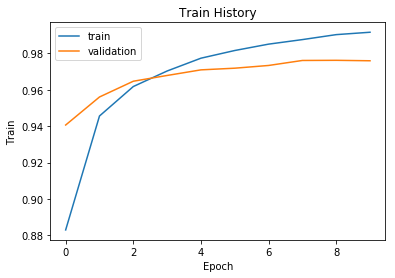

In [14]:
show_train_history(train_history, 'acc', 'val_acc')

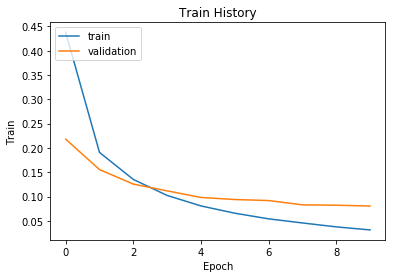

In [15]:
show_train_history(train_history, 'loss', 'val_loss')

# 以测试数据评估模型准确率

In [16]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)#使用model.evaluate评估模型准确率，评估后的准确率保存在scores中
print()
print('accuracy=',scores[1])#显示准确率

10000/10000 [==============================] - 0s 43us/step

accuracy= 0.9762


# 进行预测

In [21]:
prediction = model.predict_classes(x_Test)#输入变量x)x_Test,结果储存在predection中

10000/10000 [==============================] - 0s 32us/step


In [22]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [23]:
import matplotlib.pyplot as plt
def plot_images_labels_predection(images, labels, prediction, idx, num = 10):
#函数的参数分别是images（数字图像），labels（真实值），prediction（预测结果），idx(开始显示的数据index)，num(要显示的数据项数，默认是10.不超过25)
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num):
        #绘制图形
        ax = plt.subplot(5, 5, i + 1)
        ax.imshow(images[idx], cmap = 'binary')
        title = 'label=' + str(labels[idx])#设置标题
        if len(predection)>0:#如果传入了预测结果
            title+= ',predict=' + str(prediction[idx])#标题
        
        ax.set_title(title, fontsize = 10)#设置子图形标题
        ax.set_xticks([]);ax.set_yticks([])#设置不显示刻度
        idx+=1#读取下一项
    plt.show()

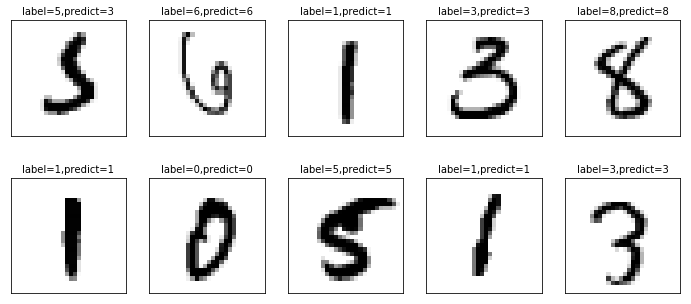

In [24]:
plot_images_labels_predection(x_test_image, y_test_label, prediction,idx = 340)

# 显示混淆矩阵

In [22]:
import pandas as pd
pd.crosstab(y_test_label, predection, rownames = ['label'], colnames = ['predict'])
#参数分别为测试数据图像的真实值，预测值，行和列名称

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,6,0,1009,2,1,0,2,3,9,0
3,0,0,2,996,0,0,0,3,5,4
4,1,0,5,1,960,0,3,0,2,10
5,3,0,0,15,1,852,7,1,10,3
6,5,3,1,1,3,3,939,0,3,0
7,0,5,13,7,1,0,0,988,5,9
8,4,0,3,7,0,1,1,2,955,1


In [23]:
df = pd.DataFrame({'label': y_test_label, 'predict': predection})
df[:2]

,label,predict
0,7,7
1,2,2


In [24]:
df[(df.label == 5) & (df.predict == 3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
4271,5,3
4355,5,3


In [25]:
import matplotlib.pyplot as plt
def plot_images_labels_predection(images, labels, predection, idx, num = 10):
#函数的参数分别是images（数字图像），labels（真实值），prediction（预测结果），idx(开始显示的数据index)，num(要显示的数据项数，默认是10.不超过25)
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num):
        #绘制图形
        ax = plt.subplot(5, 5, i + 1)
        ax.imshow(images[idx], cmap = 'binary')
        title = 'label=' + str(labels[idx])#设置标题
        if len(predection)>0:#如果传入了预测结果
            title+= ',predict=' + str(prediction[idx])#标题
        
        ax.set_title(title, fontsize = 10)#设置子图形标题
        ax.set_xticks([]);ax.set_yticks([])#设置不显示刻度
        idx+=1#读取下一项
    plt.show()

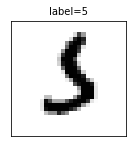

In [26]:
plot_images_labels_predection(x_test_image, y_test_label, [], idx = 340, num = 1)

# 隐藏层增加为1000个神经元

In [27]:
model = Sequential()

model.add(Dense(units=1000, input_dim = 784, kernel_initializer='normal', activation='relu'))

model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [28]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history = model.fit(x = x_Train_normalize, y = y_Train_OneHot, validation_split=0.2, epochs=10, 
                          batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 6s - loss: 0.2905 - acc: 0.9161 - val_loss: 0.1537 - val_acc: 0.9560
Epoch 2/10
 - 5s - loss: 0.1149 - acc: 0.9671 - val_loss: 0.1214 - val_acc: 0.9633
Epoch 3/10
 - 5s - loss: 0.0735 - acc: 0.9794 - val_loss: 0.0917 - val_acc: 0.9734
Epoch 4/10
 - 5s - loss: 0.0518 - acc: 0.9856 - val_loss: 0.0816 - val_acc: 0.9747
Epoch 5/10
 - 5s - loss: 0.0359 - acc: 0.9902 - val_loss: 0.0836 - val_acc: 0.9751
Epoch 6/10
 - 6s - loss: 0.0247 - acc: 0.9940 - val_loss: 0.0736 - val_acc: 0.9779
Epoch 7/10
 - 5s - loss: 0.0184 - acc: 0.9954 - val_loss: 0.0723 - val_acc: 0.9780
Epoch 8/10
 - 6s - loss: 0.0134 - acc: 0.9968 - val_loss: 0.0746 - val_acc: 0.9787
Epoch 9/10
 - 7s - loss: 0.0100 - acc: 0.9980 - val_loss: 0.0720 - val_acc: 0.9796
Epoch 10/10
 - 6s - loss: 0.0066 - acc: 0.9991 - val_loss: 0.0769 - val_acc: 0.9784


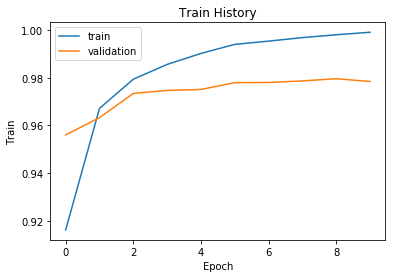

In [30]:
show_train_history(train_history, 'acc', 'val_acc')

In [31]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=', scores[1])

10000/10000 [==============================] - 1s 100us/step

accuracy= 0.9799


# 多层感知器加入DropOut功能避免过拟合

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout #导入DropOut模块

model = Sequential()

model.add(Dense(units=1000, input_dim = 784, kernel_initializer='normal', activation='relu'))

model.add(Dropout(0.5))#加入DropOut功能

model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [33]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

train_history = model.fit(x = x_Train_normalize, y = y_Train_OneHot, validation_split=0.2, epochs=10, 
                          batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 6s - loss: 0.3532 - acc: 0.8943 - val_loss: 0.1619 - val_acc: 0.9546
Epoch 2/10
 - 6s - loss: 0.1596 - acc: 0.9532 - val_loss: 0.1180 - val_acc: 0.9653
Epoch 3/10
 - 6s - loss: 0.1150 - acc: 0.9666 - val_loss: 0.0968 - val_acc: 0.9700
Epoch 4/10
 - 6s - loss: 0.0909 - acc: 0.9726 - val_loss: 0.0875 - val_acc: 0.9726
Epoch 5/10
 - 6s - loss: 0.0742 - acc: 0.9772 - val_loss: 0.0800 - val_acc: 0.9763
Epoch 6/10
 - 6s - loss: 0.0643 - acc: 0.9799 - val_loss: 0.0752 - val_acc: 0.9773
Epoch 7/10
 - 6s - loss: 0.0546 - acc: 0.9836 - val_loss: 0.0757 - val_acc: 0.9783
Epoch 8/10
 - 6s - loss: 0.0468 - acc: 0.9857 - val_loss: 0.0707 - val_acc: 0.9787
Epoch 9/10
 - 6s - loss: 0.0419 - acc: 0.9865 - val_loss: 0.0702 - val_acc: 0.9797
Epoch 10/10
 - 6s - loss: 0.0375 - acc: 0.9881 - val_loss: 0.0684 - val_acc: 0.9802


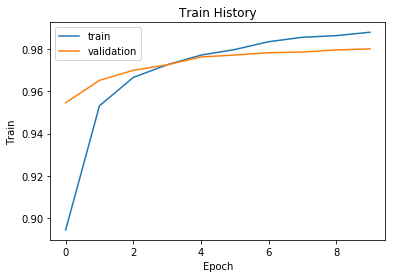

In [35]:
show_train_history(train_history, 'acc', 'val_acc')

In [36]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=', scores[1])

10000/10000 [==============================] - 1s 80us/step

accuracy= 0.9828


# 建立多层感知器模型包含两个隐藏层

In [37]:
model = Sequential()

#加入输入层和隐藏层1
model.add(Dense(units=1000, input_dim = 784, kernel_initializer='normal', activation='relu'))

model.add(Dropout(0,5))

#加入隐藏层2
model.add(Dense(units=1000, kernel_initializer='normal', activation='relu'))

model.add(Dropout(0.5))

#加入输出层
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [38]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [39]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
train_history = model.fit(x = x_Train_normalize, y = y_Train_OneHot, validation_split=0.2, epochs=10, 
                          batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 14s - loss: 0.2785 - acc: 0.9150 - val_loss: 0.1137 - val_acc: 0.9653
Epoch 2/10
 - 14s - loss: 0.0990 - acc: 0.9705 - val_loss: 0.1064 - val_acc: 0.9686
Epoch 3/10
 - 14s - loss: 0.0610 - acc: 0.9810 - val_loss: 0.0820 - val_acc: 0.9758
Epoch 4/10
 - 15s - loss: 0.0423 - acc: 0.9868 - val_loss: 0.0806 - val_acc: 0.9759
Epoch 5/10


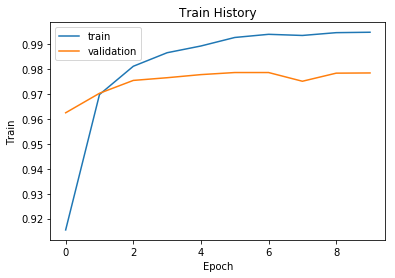

In [39]:
show_train_history(train_history, 'acc', 'val_acc')

In [40]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print('accuracy=', scores[1])

10000/10000 [==============================] - 1s 112us/step
accuracy= 0.9807
